In [2]:
import pandas as pd
from pandas import Series,DataFrame

#El archivo del INEGI que trae los datos se llama def15.CSV
defunciones_mex = pd.read_csv('defun15.CSV')

#Mostramos los primeras cinco renglones
defunciones_mex.head()

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2015,NaN,2,2,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2015,NaN,9,1,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2015,NaN,9,1,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2015,NaN,2,1,88,88,888,8888,0,999
4,1,1,1,1,15,1,1,1,15,1,...,2015,NaN,2,2,88,88,888,8888,0,999


In [3]:
#observamos la información que posee nuestra base
defunciones_mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655688 entries, 0 to 655687
Data columns (total 59 columns):
ent_regis     655688 non-null int64
mun_regis     655688 non-null int64
ent_resid     655688 non-null int64
mun_resid     655688 non-null int64
tloc_resid    655688 non-null int64
loc_resid     655688 non-null int64
ent_ocurr     655688 non-null int64
mun_ocurr     655688 non-null int64
tloc_ocurr    655688 non-null int64
loc_ocurr     655688 non-null int64
causa_def     655688 non-null object
lista_mex     655688 non-null object
sexo          655688 non-null int64
edad          655688 non-null int64
dia_ocurr     655688 non-null int64
mes_ocurr     655688 non-null int64
anio_ocur     655688 non-null int64
dia_regis     655688 non-null int64
mes_regis     655688 non-null int64
anio_regis    655688 non-null int64
dia_nacim     655688 non-null int64
mes_nacim     655688 non-null int64
anio_nacim    655688 non-null int64
ocupacion     655688 non-null int64
escolarida    655688 no

In [4]:
#importamos las bibliotecas necesarias para la visualización
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

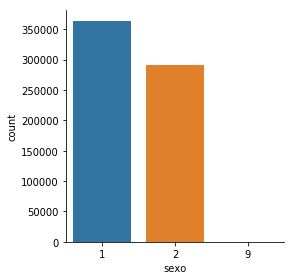

In [5]:
#vemos el número de muertes a nivel nacional por sexo
sns.factorplot('sexo', data=defunciones_mex, kind='count')

#Valor	Categoría
#1	Hombre
#2	Mujer
#9	No especificado

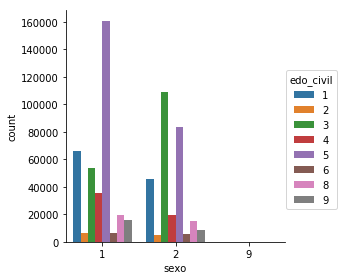

In [6]:
#En gráfica anterior tenemos que 1 = hombre y 2 = mujeres (INEGI)
#por lo que observamos que a nivel nacional mueren más hombres que
#mujeres. (Las muertes se deben a diferentes causas)

#Cual es el estado civil de las personas que fallecen?

sns.factorplot('sexo', data=defunciones_mex, hue='edo_civil', kind='count')

#Valor	Categoría
#1	Soltero (a)
#2	Divorciado (a)
#3	Viudo (a)
#4	Unión libre
#5	Casado (a)
#6	Separado (a)
#8	No aplica a menores de 12 años
#9	No especificado




In [7]:
#Y como es la situación de suicuidio a nivel nacional
def suicidios_mex(person):
    presunto, sexo = person
    
    if presunto == 3:
        return 'suicidio'
    else:
        return
    

In [8]:
#creamos una nueva columna llamada suicidios_nac
defunciones_mex['suicidios_nac'] = defunciones_mex[['presunto', 'sexo']].apply(suicidios_mex, axis = 1)

In [9]:
defunciones_mex[0:5]

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,suicidios_nac
0,1,1,1,1,15,1,1,1,15,1,...,NaN,2,2,88,88,888,8888,0,999,NaN
1,1,1,1,1,15,1,1,1,15,1,...,NaN,9,1,88,88,888,8888,0,999,NaN
2,1,1,1,1,15,1,1,1,15,1,...,NaN,9,1,88,88,888,8888,0,999,NaN
3,1,1,1,1,15,1,1,1,15,1,...,NaN,2,1,88,88,888,8888,0,999,NaN
4,1,1,1,1,15,1,1,1,15,1,...,NaN,2,2,88,88,888,8888,0,999,NaN


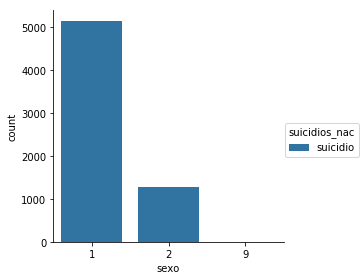

In [10]:
sns.factorplot('sexo', data=defunciones_mex, hue= 'suicidios_nac', kind='count')
#se aprecia en la gráfica que se suicidan mas hombres que mujeres a nivel nacional

In [11]:
#La cantidad de suiciodos fue:
defunciones_mex['suicidios_nac'].value_counts().value_counts()




6425    1
Name: suicidios_nac, dtype: int64

In [12]:
#Cuál fue la cantidad exacta de suicidios entre hombres y mujeres?
defunciones_mex['suicidios_nac'].groupby(defunciones_mex['sexo']).value_counts()

sexo  suicidios_nac
1     suicidio         5141
2     suicidio         1280
9     suicidio            4
Name: suicidios_nac, dtype: int64

In [13]:
#Ahora vamos a analizar la situación de campeche, código 4.
def suicidio_campeche(persona):
    ent_ocurr, edad, presunto, sexo = persona
    
    if (ent_ocurr == 4 and presunto == 3):
        return 'suicidio'
    else:
        return 


In [14]:
defunciones_mex['suicidio_campeche'] = defunciones_mex[['ent_ocurr','edad','presunto','sexo']].apply(suicidio_campeche, axis=1)

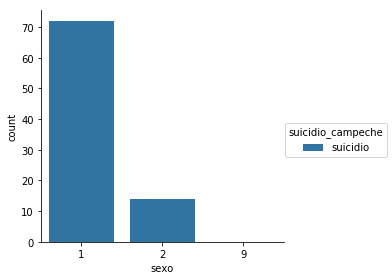

In [15]:
sns.factorplot('sexo', data=defunciones_mex, hue='suicidio_campeche', kind='count')

In [16]:
defunciones_mex['suicidio_campeche'].groupby(defunciones_mex['sexo']).value_counts()
#Se puede observar que la tendecia sigue siendo más hacia hombres.

sexo  suicidio_campeche
1     suicidio             72
2     suicidio             14
Name: suicidio_campeche, dtype: int64